In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

In [96]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"

columns = [
    "Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"
]

data = pd.read_csv(url, names=columns)

data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


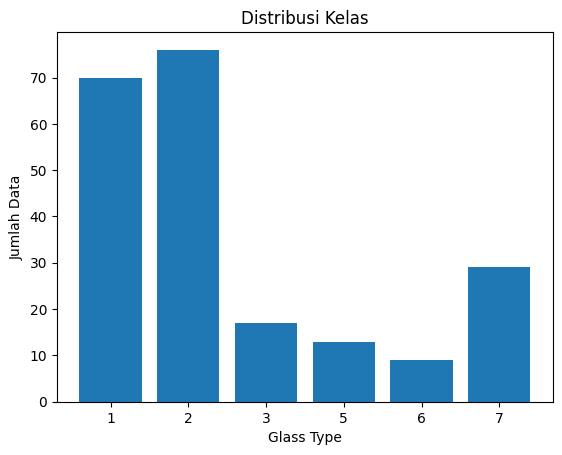

In [97]:
class_counts = data["Type"].value_counts().sort_index()
plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.xlabel("Glass Type")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas")
plt.show()

In [98]:
X = data.drop("Type", axis=1)
y = data["Type"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [100]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [102]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10,),
                     max_iter=2000,
                     random_state=42)

mlp1.fit(X_train_smote, y_train_smote)
y_pred1 = mlp1.predict(X_test)

print("1 Hidden Layer dengan neuron 10")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

1 Hidden Layer dengan neuron 10
Accuracy: 0.9534883720930233
[[14  0  0  0  0  0]
 [ 0 13  1  0  1  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.87      0.93        15
           3       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.95        43
   macro avg       0.90      0.98      0.93        43
weighted avg       0.97      0.95      0.96        43



In [103]:
mlp2 = MLPClassifier(hidden_layer_sizes=(50,),
                     max_iter=1000,
                     random_state=42)

mlp2.fit(X_train_smote, y_train_smote)
y_pred2 = mlp2.predict(X_test)

print("1 Hidden Layer dengan neuron 50")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

1 Hidden Layer dengan neuron 50
Accuracy: 0.9069767441860465
[[14  0  0  0  0  0]
 [ 0 13  1  0  1  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      0.87      0.90        15
           3       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.91        43
   macro avg       0.84      0.87      0.85        43
weighted avg       0.91      0.91      0.91        43



In [104]:
mlp3 = MLPClassifier(hidden_layer_sizes=(100,),
                     max_iter=1000,
                     random_state=42)

mlp3.fit(X_train_smote, y_train_smote)
y_pred3 = mlp3.predict(X_test)

print("1 Hidden Layer dengan neuron 100")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

1 Hidden Layer dengan neuron 100
Accuracy: 0.9069767441860465
[[14  0  0  0  0  0]
 [ 0 13  1  0  1  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      0.87      0.90        15
           3       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.91        43
   macro avg       0.84      0.87      0.85        43
weighted avg       0.91      0.91      0.91        43



In [105]:
mlp4 = MLPClassifier(hidden_layer_sizes=(100,50),
                     max_iter=1000,
                     random_state=42)

mlp4.fit(X_train_smote, y_train_smote)
y_pred4 = mlp4.predict(X_test)
print("2 Hidden Layer dengan neuron 100 dan 50")
print("Accuracy:", accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

2 Hidden Layer dengan neuron 100 dan 50
Accuracy: 0.9302325581395349
[[14  0  0  0  0  0]
 [ 0 14  0  0  1  0]
 [ 0  0  3  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.93      0.93      0.93        15
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.93        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.93      0.93      0.93        43



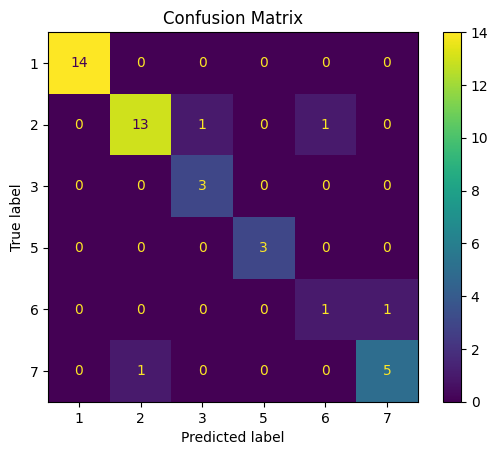

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[1,2,3,5,6,7])
disp.plot()
plt.title("Confusion Matrix")
plt.show()